<a href="https://colab.research.google.com/github/mariamtolu/demo/blob/main/Choosing_the_right_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Define the problem domain

In [4]:

!pip install azureml-core
!pip install azureml-dataset-runtime --upgrade
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '90491e55-0d91-47aa-bedf-5f2dd37196e4'
resource_group = 'MariamFakeye'
workspace_name = 'project'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Automobilepricedata')
data = dataset.to_pandas_dataframe()
data.head()

     |████████████████████████████████| 39.4 MB 1.3 MB/s 
     |████████████████████████████████| 13.1 MB 37.8 MB/s 
     |████████████████████████████████| 1.3 MB 36.0 MB/s 
     |████████████████████████████████| 129 kB 47.4 MB/s 
     |████████████████████████████████| 28.7 MB 138 kB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Q. Identify candidate questions for your machine learning project

regression

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [ ]:
symboling	normalized-losses	make	fuel-type	aspiration	num-of-doors	body-style	drive-wheels	engine-location	wheel-base	length	width	height	curb-weight	engine-type	num-of-cylinders	engine-size	fuel-system	bore	stroke	compression-ratio	horsepower	peak-rpm	city-mpg	highway-mpg	price
0	3	?	alfa-romero	gas	std	two	convertible	rwd	front	88.6	168.8	64.1	48.8	2548	dohc	four	130	mpfi	3.47	2.68	9.0	111	5000	21	27	13495
1	3	?	alfa-romero	gas	std	two	convertible	rwd	front	88.6	168.8	64.1	48.8	2548	dohc	four	130	mpfi	3.47	2.68	9.0	111	5000	21	27	16500
2	1	?	alfa-romero	gas	std	two	hatchback	rwd	front	94.5	171.2	65.5	52.4	2823	ohcv	six	152	mpfi	2.68	3.47	9.0	154	5000	19	26	16500
3	2	164	audi	gas	std	four	sedan	fwd	front	99.8	176.6	66.2	54.3	2337	ohc	four	109	mpfi	3.19	3.40	10.0	102	5500	24	30	13950
4	2	164	audi	gas	std	four	sedan	4wd	front	99.4	176.6	66.4	54.3	2824	ohc	five	136	mpfi	3.19	3.40	8.0	115	5500	18	22	17450

### Q. Generate a descriptive statistics report for the columns in your dataset

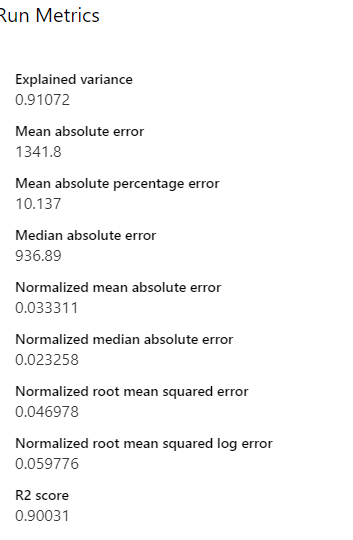

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

data were missing at random and I would ave dropped it

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

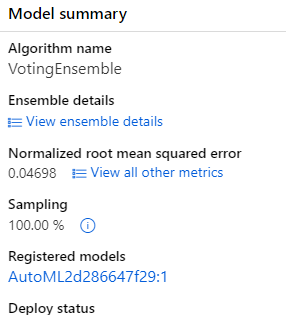

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

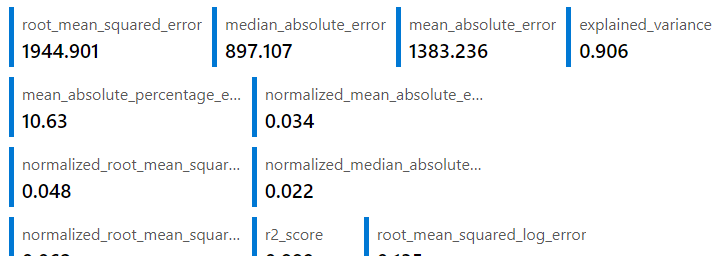

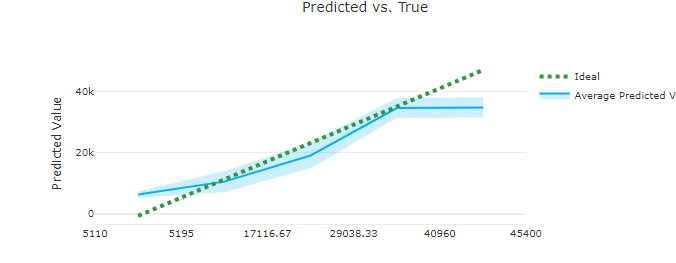

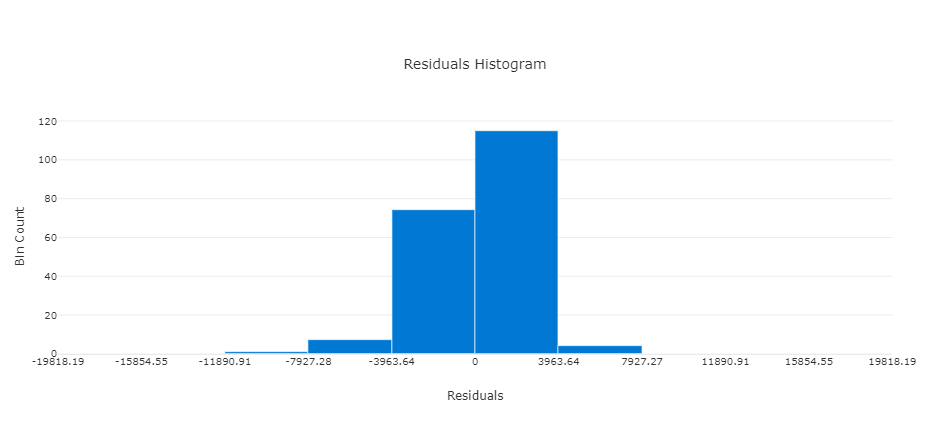

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [12]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
    "data":
    [
        {
            'symboling': "0",
            'normalized-losses': "example_value",
            'make': "example_value",
            'fuel-type': "example_value",
            'aspiration': "example_value",
            'num-of-doors': "example_value",
            'body-style': "example_value",
            'drive-wheels': "example_value",
            'engine-location': "example_value",
            'wheel-base': "0",
            'length': "0",
            'width': "0",
            'height': "0",
            'curb-weight': "0",
            'engine-type': "example_value",
            'num-of-cylinders': "example_value",
            'engine-size': "0",
            'fuel-system': "example_value",
            'bore': "example_value",
            'stroke': "example_value",
            'compression-ratio': "0",
            'horsepower': "example_value",
            'peak-rpm': "example_value",
            'city-mpg': "0",
            'highway-mpg': "0",
        },
    ],
}

body = str.encode(json.dumps(data))

url = 'http://874bd145-0dc9-4c21-8e40-4c8c62ec563f.eastus2.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

b'"{\\"result\\": [4252.71844093828]}"'
